<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/Simulacion-I/blob/main/prueba_de_las_frecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prueba de las frecuencias

Proponemos:
$$H_0: x_n\sim U(0,1)$$

y

$$H_a: x_n\not\sim U(0,1)$$

Como prueba para saber si un conjunto de datos proviene de la distribución $U(0,1)$.

Estadístico de prueba:

$$\chi_0=\frac{(f_o-f_e)^2}{f_o}$$

Si $|\chi_0|<\chi(1-α,v)$, entonces no se rechaza la hipótesis, de lo contrario, se rechaza. Con $\alpha$ siendo el nivel de confianza y $v$ los grados de libertad.

In [26]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import requests
import ast
import matplotlib.pyplot as plt
import tabulate

In [13]:
url = "https://raw.githubusercontent.com/LuisManuelCatzoliSoriano/Simulacion-I/refs/heads/main/data.txt"

response = requests.get(url) #Descarga el contenido del link
contenido = response.text #Transforma el contenido en un texto

lista = ast.literal_eval(contenido) #Transforma un texto en una lista

df = pd.DataFrame(lista, columns=["datos"]) #Crea un DataFrame a partir de la lista de números
df.head() #Muestra las primeras filas del DataFrame

,datos
0,0.78961
1,0.05230
2,0.10699
3,0.55877
4,0.14151


Primero calculo las frecuencias por intervalo:

In [3]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.01]

indices = np.digitize(df, bins, right=False)

conteos = [(indices == i).sum() for i in range(1, len(bins))]

frecuencias, intervalos = np.histogram(df, [0, 0.2,0.4, 0.6, 0.8,1])

print("Frecuencias:", frecuencias)
print("Intervalos:", intervalos)

Frecuencias: [21 22 19 23 15]
Intervalos: [0.  0.2 0.4 0.6 0.8 1. ]


Para iniciar pongo el código para generar la tabla usando nuestra muestra:

In [34]:
fe = df.size / (len(intervalos) - 1)

table_data = []
for i in range(len(frecuencias)):
    f_o = frecuencias[i]
    f_e = fe
    chi_square_contribution = (f_o - f_e)**2 / f_o

    interval_str = f"[{intervalos[i]:.1f}, {intervalos[i+1]:.1f})"
    table_data.append([interval_str, f_o, f_e, chi_square_contribution])

encabezados = ["Intervalo", "F. Obs", "F. Esp", "(f_o-f_e)^2/f_o"]
print(tabulate.tabulate(table_data, headers=encabezados, tablefmt="psql", numalign="center"))

chi_sum = sum(item[3] for item in table_data)

print("El valor de chi:", chi_sum)

+-------------+----------+----------+-------------------+
| Intervalo   |  F. Obs  |  F. Esp  |  (f_o-f_e)^2/f_o  |
|-------------+----------+----------+-------------------|
| [0.0, 0.2)  |    21    |    20    |     0.047619      |
| [0.2, 0.4)  |    22    |    20    |     0.181818      |
| [0.4, 0.6)  |    19    |    20    |     0.0526316     |
| [0.6, 0.8)  |    23    |    20    |     0.391304      |
| [0.8, 1.0)  |    15    |    20    |      1.66667      |
+-------------+----------+----------+-------------------+
El valor de chi: 2.3400398228773516


Defino la función que hará la prueba:

In [16]:
def pdfrecuencias(data, intervalos, alpha):
    fe=df.size/(len(intervalos)-1)
    chi = np.sum((data-fe)**2/data)
    print("El valor de chi cuadrada:", chi)
    v=len(intervalos)-2
    chi_0 = stats.chi2.ppf(1-alpha, v)
    print("El valor de chi cuadrada con nuestros grados de libertad:", chi_0)
    if chi < chi_0:
        return print("No se rechaza la hipótesis, la muestra proviene de una función uniforme")
    else:
        return print("Se rechaza la hipótesis, la muestra no provienen de una función uniforme")

Tomo $\alpha=0.05$ y llamo la función:

In [17]:
pdfrecuencias(frecuencias, intervalos, 0.05)

El valor de chi cuadrada: 2.3400398228773516
El valor de chi cuadrada con nuestros grados de libertad: 9.487729036781154
No se rechaza la hipótesis, la muestra proviene de una función uniforme


Por último, es de interés ver las frecuencias en un histograma:

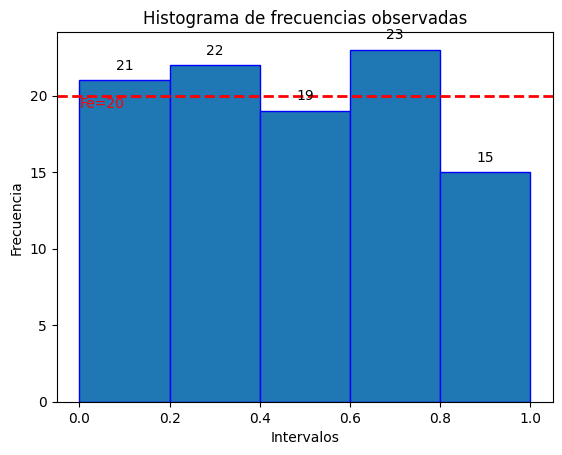

In [50]:
plt.hist(df, bins=intervalos, edgecolor='blue')
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia")
plt.title("Histograma de frecuencias observadas")
plt.axhline(y=fe, color='red', linestyle='--', linewidth=2)
plt.text(intervalos[0], fe * 0.95, 'Fe=20', color='red', ha='left', va='bottom')

for i in range(len(frecuencias)):
    bar_center_x = (intervalos[i] + intervalos[i+1]) / 2
    bar_height = frecuencias[i]
    plt.text(bar_center_x, bar_height + 0.5, str(bar_height), ha='center', va='bottom', fontsize=10)

plt.show()